# K-meansクラスタリング

この演習では下記の2種類のデータを用いて，K-meansクラスタリングを体験します．
* アヤメの個体データ
* 人工的な2次元データ

演習に先立って，必要なライブラリを読み込んでおきます．
以下のコードをGoogle Colaboratoryに貼り付けて実行してください．

In [1]:
# 表形式のデータを操作するためのライブラリ
import pandas as pd

# 行列計算をおこなうためのライブラリ
import numpy as np

# 機械学習用ライブラリsklearnのKmeansクラス
from sklearn.cluster import KMeans

# グラフ描画ライブラリ
import matplotlib.pyplot as plt
%matplotlib inline

---
## 例題1: アヤメデータに対するK-meansクラスタリング

データ分析を学習する際，例題データとしてアヤメ（英語名:Iris）データがよく用いられます．
[アヤメ](https://ja.wikipedia.org/wiki/アヤメ)は植物の1つです．
この演習でもアヤメデータを使ってみましょう．

### データの準備
以下のコードを実行して，アヤメのデータを読み込みましょう．
下記コードを実行すると，変数`iris_df`（pandasデータフレーム）にアヤメのデータが読み込まれます．

In [2]:
from sklearn import datasets

# Iris（アヤメ）の大きさに関するデータをロード
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

# 簡単のために，カラム名を修正しておく
iris_df = iris_df.rename(
    columns = {
        'sepal length (cm)': 'sepal_length',
        'sepal width (cm)': 'sepal_width',
        'petal length (cm)': 'petal_length',
        'petal width (cm)': 'petal_width'
    }
)

どんなデータが入っているか，iris_dfの中身をのぞいてみましょう．

In [3]:
# ロードしたデータの中身（最初の数件）を確認
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


このデータには，アヤメの「花弁（Petal）」と「がく（Sepal）」の大きさ，長さ，およびアヤメの品種に関する情報が入っています．1行1行がアヤメの個体に対応しています．

格納されているアヤメの種類はsetosa, virginica, versicolorの3種類です．それぞれの品種について，50個ずつデータが入っています．


### データの可視化

この演習では，品種（species）の情報は無視して，花弁とがくの大きさ・長さの4種類の指標に着目します．
つまり**4次元**のデータを扱います．

私たちは普段3次元の世界で生きているので，4次元のデータをイメージすることは難しいです．ですので，まずはデータを2次元にして，データの様子を可視化してみましょう．

アヤメデータから花弁の大きさ，長さのみを取り出して，XY平面に点をプロットしてみましょう．Pandasデータフレームでは，``df.x``とすると表データ``df``の列``x``のデータを抜き出すことができます．点をプロットするには``plt.scatter``関数を用います．

では，下記のコードを実行してみてください．

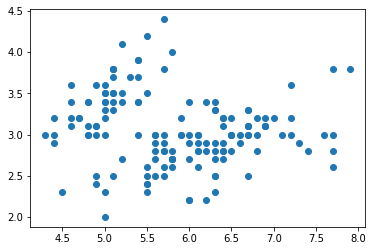

In [4]:
plt.scatter(iris_df.sepal_length, iris_df.sepal_width)

表示されたグラフ（散布図）を眺めてみてください．「データをグルーピングする」という観点で眺めたとき，何か特徴はつかめたでしょうか？心の目で眺めてみると，なんとなくですが，データ点が「左上」と「右下」で分かれているような気もします．

### K-meansクラスタリングの実行

今回のアヤメのデータには3種類の品種が混じっています．もし品種毎に性質がキレイに分かれるとすると，上記の点の集合も3グループに分かれてもよさそうです．ということで，今回はクラスタ数を**3**として，K-meansクラスタリングを実行してみましょう．

K-meansクラスタリングを実行するには`sklearn`ライブラリの``KMeans``クラスを用います．

上でアヤメデータを可視化したときは，花弁の長さと大きさの2指標に絞ってデータを眺めてみました．
今回のK-meansクラスタリングでは，その2指標を特徴とする2次元データに対して分析をしてみましょう．

完全なアヤメデータから「花弁の長さ」と「大きさ」のみに着目してデータを取り出すには以下のようにします．

In [5]:
target_features = ['sepal_length', 'sepal_width']
iris_df[target_features]

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


このデータに対してK-meansを実行してみましょう．

`sklearn`ライブラリで機械学習を行う場合，以下のようなステップを踏みます：
1. 学習モデルのクラスインスタンスを作成
2. データを入力し学習（fitメソッド）
3. 学習済みモデルを用いて，分析結果を得る（transformやpredictメソッド）

今回は`sklearn`ライブラリの``KMeans``クラスを用います．以下のコードを実行し，クラスタリングを実行します．

In [6]:
# クラスタ数を3に指定
model = KMeans(n_clusters=3, init='random')

# クラスタリングを実行
model.fit(iris_df[target_features])

KMeans(init='random', n_clusters=3)

クラスタリングが完了しました．クラスタリング結果は`model`が保持しています．各データがどのクラスタに分類されたかを抽出するには，以下のコードを実行します．

In [7]:
# クラスタリング結果をlabelsに格納
labels = model.labels_

# 表示
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

クラスタリングの結果をもとに，上で表示させた散布図にクラスタ毎に色をつけてみましょう．
何も考えずに以下のコードを実行してみてください．

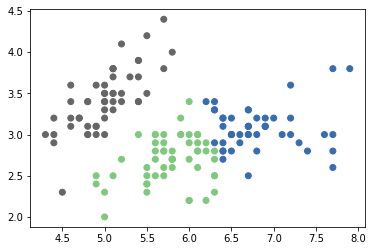

In [8]:
plt.scatter(
    iris_df.sepal_length, iris_df.sepal_width,
    c=labels,  # クラスタに応じて色分け
    cmap="Accent"
)

では，クラスタではなく**あらかじめ分かっている3種類の品種**ごとに，散布図に色づけをしてみましょう．下記のコードを実行します．クラスタリングの結果をもとに色分けした散布図と比較してみてください．

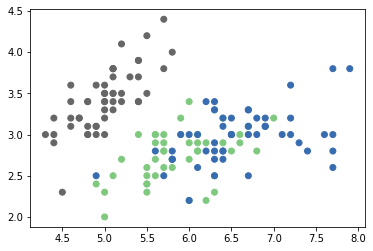

In [9]:
# 品種にIDを割り振る
species_id = {'versicolor': 0, 'virginica': 1, 'setosa': 2}

# 可視化
plt.scatter(
    iris_df.sepal_length, iris_df.sepal_width,
    c=[species_id[s] for s in iris_df.species], # もともとの品種に応じて色分け
    cmap="Accent" # カラーパレット
)

散布図の右下で色が入り乱れています．このことから，花弁の大きさと長さだけではアヤメデータを3種類に分類することができないことが予想されます．

少し脱線しますが，アヤメデータの各指標（特徴量）の相関関係を品種ごとに表示してみましょう．
以下のコードを実行します．

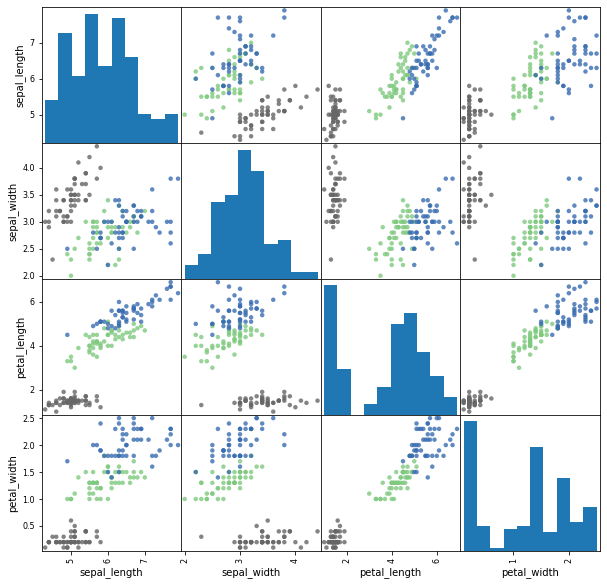

In [10]:
pd.plotting.scatter_matrix(
    iris_df,
    c=[species_id[s] for s in iris_df.species], # 品種ごとに色分け
    figsize=(10, 10), s=80, alpha=0.8, cmap="Accent" # 見た目の調整
)
plt.show()

図を眺めてみると，petal_length，petal_widthの特徴も種ごとにある程度のまとまりがあるようにも見えます．そうならば，sepal_length，sepal_widthの2種類だけでなく，他のすべての特徴をつかったほうがもっと高精度にグルーピングができそうです．

では，先ほどのアヤメデータのK-meansクラスタリングを，2次元ではなく4次元データにして再度実行してみましょう．
以下のコードを実行します．

In [11]:
# 注目する特徴量
target_features = ['sepal_length', 'sepal_width',
                   'petal_length', 'petal_width' # 追加項目
                  ]

# クラスタリングを実行
model = KMeans(n_clusters=3, init='random')
model.fit(iris_df[target_features])

labels = model.labels_

4次元データのクラスタリング結果を使って，散布図を色分けしてみましょう．
以下のコードを実行します．

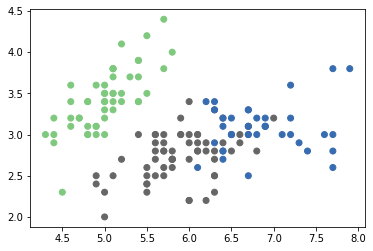

In [12]:
plt.scatter(
    iris_df.sepal_length, iris_df.sepal_width,
    c=labels,  # クラスタに応じて色分け
    cmap="Accent"
)

どうでしょうか？3つの品種がより重なりなく分割されたような気がします．

---

## 例題2: 人工データに対するK-meansクラスタリング

K-meansクラスタリングの効果，特徴をもう少し体感するために，別のデータを分析してみましょう．

次に用いるデータは人工的に作られた5000個の2次元データです．データに特に意味はありません．
用いるデータは[University of Eastern Finlandの計算学部が公開しているデータセット](http://cs.joensuu.fi/sipu/datasets/)です．

以下のコードを実行して，``s1_df``変数にデータを読み込んでください．

In [13]:
url = "http://drive.hontolab.org/ymc-lecture2020/data/artificial_data.tsv"
s1_df = pd.read_table(url, sep="\t")

# 最初の10件のデータを表示
s1_df.head(10)

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046
5,588100,557588
6,582015,546191
7,604678,574577
8,572029,518313
9,604737,574591


データの傾向を見るために，XY平面にデータをプロットしてみましょう．
下記のコードを実行します．

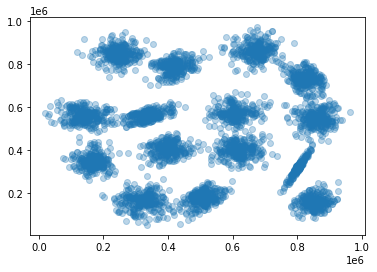

In [14]:
plt.scatter(s1_df.x, s1_df.y, alpha=0.3)
plt.show()

今回のデータの特徴は分かりやすいですね．目視レベルでは**15個**のクラスタに分かれているように見えます．

では，K-meansクラスタリングによって，目論見どおりにデータを15個のクラスタに分けられるか試してみましょう．
以下のコードを実行します．

In [15]:
# クラスタリングを実行
model = KMeans(n_clusters=15, init='random')
model.fit(s1_df)

# 結果を格納
labels = model.labels_

アヤメのデータと同様に，クラスタリングの結果を踏まえて，散布図を色分けしてみましょう．
今回はクラスタの数が15と多いので，下記のコードを実行して色分けのための準備を行います．

下記コードを実行して，散布図を15のグループごとに色分けします．
K-meansクラスタリングは，目論見どおりにデータを分割できていたでしょうか？

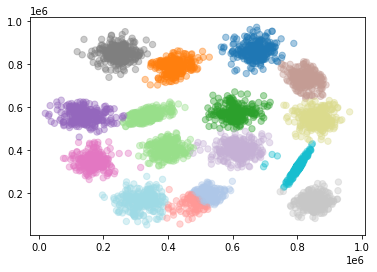

In [16]:
plt.scatter(
    s1_df.x, s1_df.y,
    c=labels,
    alpha=0.4, # 透明度
    s=40, # マーカーのサイズ
    cmap="tab20_r" # カラーパレット（20色対応）
)